# Step 3: Perform Calculation of Basic Statistics based on Lake Michigan Imagery Data

After reconstructing the Lake Michigan area data into 2-Dimension, we will attempt to calculate the mean, standard deviation, skewness, centroid, and kurtosis along the directions of latitude and longitude.

In [1]:
# cited source: https://stackoverflow.com/questions/13894631/image-skewness-kurtosis-in-python

In [2]:
import os
import pandas as pd
import scipy
import numpy as np
from tqdm import tqdm

In [3]:
os.getcwd()
os.chdir("/srv/scratch/NOAA/GOES_Hourly_Statistics/zone_0_T_2013Fall_2014Spring")
os.getcwd()

'/srv/scratch/NOAA/GOES_Hourly_Statistics/zone_0_T_2013Fall_2014Spring'

In [4]:
len(os.listdir())

15607

In [5]:
filename = os.listdir()
filename.sort()
len(filename)

15607

In [6]:
# for fn in filename:
#     time_f = str(fn[20:22])
#     print(time_f)
    #list_da.append(date_f)

In [7]:
dataset = pd.read_csv("T_goes15.2013.12.18.1700.v01.nc-var1-t0.csv.csv", index_col = 0)
dataset

,-87.9,-87.86,-87.82,-87.78,-87.74,-87.7,-87.66,-87.62,-87.58,-87.54,...,-85.14,-85.1,-85.06,-85.02,-84.98,-84.94,-84.9,-84.86,-84.82,-84.78
41.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9075,0.7650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7575,0.7750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61,0.6450,0.6200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3575,0.3600,0.3625,0.3625,0.3625,0.3650,0.3650,0.36,0.3625,0.355
45.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3625,0.3650,0.3650,0.3575,0.3650,0.3525,0.3525,0.35,0.3500,NaN
45.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3750,0.3750,0.3825,0.3800,0.3625,0.3500,0.3700,NaN,NaN,NaN
45.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3575,0.3825,0.4025,0.3850,0.3725,0.3550,NaN,NaN,NaN,NaN


In [8]:
# df_reference_1D = pd.read_csv('02-05-2023/zone_0_sample_take_2/' + 'goes15.2016.12.12.1700.v01.nc-var1-t0.csv')
# df_reference_1D.head(5)

In [9]:
# table_1D_len = df_reference_1D.shape[0]
# print(table_1D_len)

In [10]:
# df_lake_1D_map = df_reference_1D[['latitude', 'longitude']].copy()
# df_lake_1D_map.head(5)

In [11]:
# lat_list = df_lake_1D_map['latitude'].tolist()
# lon_list = df_lake_1D_map['longitude'].tolist()

In [12]:
# output_dir = 'output/'
# output_csv_name = 'lat_long_1D_labels_for_plotting.csv'

# output_file_path = os.path.join(output_dir, output_csv_name)

# df_lake_1D_map.to_csv(output_file_path, index=False)

In [13]:
def lake_1D_matcher(df_temp, df_lake_1D_map):
    # left join df_temp with df_lake_1D_map based on latitude and longitude
    df_merged_temp = pd.merge(df_lake_1D_map, df_temp, on=['latitude', 'longitude'], how='left')

    # extract value column into a list
    value_temp = df_merged_temp['value'].tolist()

    return value_temp

In [14]:
lon_v = [float(x) for x in dataset.columns.to_list()]
print(len(lon_v), max(lon_v), min(lon_v))

79 -84.78 -87.9


In [15]:
#for i in range(int(min(lon_v)*100), int((max(lon_v)+0.04)*100), 4):
    #print(i/100)

In [16]:
lat_v = [float(x) for x in dataset.index.to_list()]
print(len(lat_v), max(lat_v), min(lat_v))

106 45.98 41.78


In [17]:
n= 0
for i in range(int(min(lat_v)*100), int((max(lat_v)+0.04)*100), 4):
    n= n+1
    print(n)
    print(i/100)

1
41.78
2
41.82
3
41.86
4
41.9
5
41.94
6
41.98
7
42.02
8
42.06
9
42.1
10
42.14
11
42.18
12
42.22
13
42.26
14
42.3
15
42.34
16
42.38
17
42.42
18
42.46
19
42.5
20
42.54
21
42.58
22
42.62
23
42.66
24
42.7
25
42.74
26
42.78
27
42.82
28
42.86
29
42.9
30
42.94
31
42.98
32
43.02
33
43.06
34
43.1
35
43.14
36
43.18
37
43.22
38
43.26
39
43.3
40
43.34
41
43.38
42
43.42
43
43.46
44
43.5
45
43.54
46
43.58
47
43.62
48
43.66
49
43.7
50
43.74
51
43.78
52
43.82
53
43.86
54
43.9
55
43.94
56
43.98
57
44.02
58
44.06
59
44.1
60
44.14
61
44.18
62
44.22
63
44.26
64
44.3
65
44.34
66
44.38
67
44.42
68
44.46
69
44.5
70
44.54
71
44.58
72
44.62
73
44.66
74
44.7
75
44.74
76
44.78
77
44.82
78
44.86
79
44.9
80
44.94
81
44.98
82
45.02
83
45.06
84
45.1
85
45.14
86
45.18
87
45.22
88
45.26
89
45.3
90
45.34
91
45.38
92
45.42
93
45.46
94
45.5
95
45.54
96
45.58
97
45.62
98
45.66
99
45.7
100
45.74
101
45.78
102
45.82
103
45.86
104
45.9
105
45.94
106
45.98


In [18]:
np.shape(dataset)

(106, 79)

In [19]:
n = 0
for i in range(int(min(lon_v)*100), int((max(lon_v)+0.04)*100), 4):
    n=n+1
    print(n)
    print(i)

1
-8790
2
-8786
3
-8782
4
-8778
5
-8774
6
-8770
7
-8766
8
-8762
9
-8758
10
-8754
11
-8750
12
-8746
13
-8742
14
-8738
15
-8734
16
-8730
17
-8726
18
-8722
19
-8718
20
-8714
21
-8710
22
-8706
23
-8702
24
-8698
25
-8694
26
-8690
27
-8686
28
-8682
29
-8678
30
-8674
31
-8670
32
-8666
33
-8662
34
-8658
35
-8654
36
-8650
37
-8646
38
-8642
39
-8638
40
-8634
41
-8630
42
-8626
43
-8622
44
-8618
45
-8614
46
-8610
47
-8606
48
-8602
49
-8598
50
-8594
51
-8590
52
-8586
53
-8582
54
-8578
55
-8574
56
-8570
57
-8566
58
-8562
59
-8558
60
-8554
61
-8550
62
-8546
63
-8542
64
-8538
65
-8534
66
-8530
67
-8526
68
-8522
69
-8518
70
-8514
71
-8510
72
-8506
73
-8502
74
-8498
75
-8494
76
-8490
77
-8486
78
-8482
79
-8478


---

Experiment:

In [20]:
# Count non-nan
non_nan_num = dataset.count().sum()
non_nan_num

3599

In [21]:
cloud_pixel_num = (dataset>0.2).sum().sum()
cloud_pixel_num

3072

**[Q]** Is it a good idea to consider values in a list that are smaller than the mean value minus standard deviation as noise?

**[A]** It depends on the context and the distribution of the values in the list. In general, the mean value minus one standard deviation is used to define the range within which approximately 68% of the values in a normally distributed data set fall. Therefore, values that fall outside this range could be considered outliers or potentially noise. However, if the distribution of the data is skewed or has a long tail, this may not be a good approach as it may incorrectly identify values as noise. Additionally, the decision of whether to consider values as noise depends on the specific analysis being conducted and the goals of the analysis.

In [22]:
mean = dataset.mean(numeric_only=True, skipna=True).mean()
std = dataset.stack().std(skipna=True)
print("Mean:", mean)
print("Standard deviation:", std)

Mean: 0.36573900893697614
Standard deviation: 0.13373368120646276


In [23]:
i_testing = dataset.to_numpy().ravel()
i_2d = dataset.values

In [24]:
x_testing = np.array(i_testing).reshape(-1, 1)
# identify NaN values
mask = np.isnan(x_testing)

# create new array without NaN values
x_testing = x_testing[~mask]
x_testing = np.array(x_testing).reshape(-1, 1)
x_testing

array([[0.5725    ],
       [0.5275    ],
       [0.6475    ],
       ...,
       [0.385     ],
       [0.375     ],
       [0.35999998]])

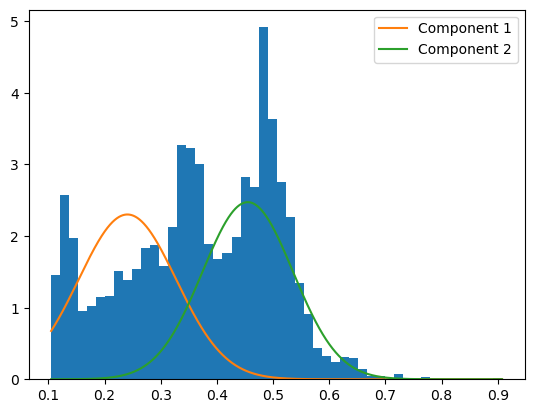

In [25]:
import plotly.express as px
from sklearn.mixture import GaussianMixture
from scipy import stats
from scipy.optimize import fsolve
from scipy.stats import norm
import plotly

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Fit a mixture of two Gaussians to the data
gmm_11 = GaussianMixture(n_components=2).fit(x_testing)

# Get the means and standard deviations of the two Gaussian components
mu1_11, mu2_11 = gmm_11.means_.flatten()
sigma1_11, sigma2_11 = np.sqrt(gmm_11.covariances_.flatten())

# Visualize the results
plt.hist(i_testing, density=True, bins = 50)
# x_axis = i_11.unique()
x_axis_11 = np.linspace(min(x_testing), max(x_testing), 3000)
plt.plot(x_axis_11, 0.5 * np.exp(-(x_axis_11 - mu1_11)**2 / (2 * sigma1_11**2)) / sigma1_11 / np.sqrt(2 * np.pi), label='Component 1')
plt.plot(x_axis_11, 0.5 * np.exp(-(x_axis_11 - mu2_11)**2 / (2 * sigma2_11**2)) / sigma2_11 / np.sqrt(2 * np.pi), label='Component 2')
plt.legend()
plt.show()

In [26]:
# Define the two normal distributions
mean1, std1 = mu1_11, sigma1_11
mean2, std2 = mu2_11, sigma2_11

dist1 = norm(mean1, std1)
dist2 = norm(mean2, std2)

# Define a function to find the difference between the two distributions
def diff(x):
    return dist1.pdf(x) - dist2.pdf(x)

# Use fsolve to find the x value where the difference is zero
x_cross_11 = fsolve(diff, x0=(mean1+mean2)/2)

print("Cross point of two normal distributions: x =", x_cross_11[0])

Cross point of two normal distributions: x = 0.349343237683899


END OF EXPERIMENT

---

In [27]:
def image_statistics(Z):
    #Input: Z, a 2D array, hopefully containing some sort of peak
    #Output: cx,cy,sx,sy,skx,sky,kx,ky
    #cx and cy are the coordinates of the centroid
    #sx and sy are the stardard deviation in the x and y directions
    #skx and sky are the skewness in the x and y directions
    #kx and ky are the Kurtosis in the x and y directions
    #Note: this is not the excess kurtosis. For a normal distribution
    #you expect the kurtosis will be 3.0. Just subtract 3 to get the
    #excess kurtosis.
#     import numpy as np
    
#     h,w = np.shape(Z)

#     x = range(w) =79 
#     y = range(h) = 106
    x = range(int(min(lon_v)*100), int((max(lon_v)+0.04)*100), 4) # 79 (-8478,-8790)
    y = range(int(min(lat_v)*100), int((max(lat_v)+0.04)*100), 4) # 106 (4598, 4178)
   
    Z_flatten = Z.to_numpy().reshape(8374, 1)
    i_testing = Z.to_numpy().ravel()
    i_2d = Z.values
    
    
#     x_testing = np.array(i_testing).reshape(-1, 1)
#     # identify NaN values
#     mask = np.isnan(x_testing)

#     # create new array without NaN values
#     x_testing = x_testing[~mask]
#     x_testing = np.array(x_testing).reshape(-1, 1)
    
#     # Fit a mixture of two Gaussians to the data
#     gmm_11 = GaussianMixture(n_components=2).fit(x_testing)

#     # Get the means and standard deviations of the two Gaussian components
#     mu1_11, mu2_11 = gmm_11.means_.flatten()
#     sigma1_11, sigma2_11 = np.sqrt(gmm_11.covariances_.flatten())
    
    
#     # Define the two normal distributions
#     mean1, std1 = mu1_11, sigma1_11
#     mean2, std2 = mu2_11, sigma2_11

#     dist1 = norm(mean1, std1)
#     dist2 = norm(mean2, std2)
    
#     # Use fsolve to find the x value where the difference is zero
#     x_cross_11 = fsolve(diff, x0=(mean1+mean2)/2)
    cutt_off_point = 0.1
    
    
    # Count non-nan
    non_nan_num = Z.count().sum()
    
    mean = Z.mean(numeric_only=True, skipna=True).mean()
    std = Z.stack().std(skipna=True)
    
    temp_thres = mean - std
    
#     q1 = Z.stack().quantile(0.2)
    
#     if cutt_off_point > 0:
    threshold = cutt_off_point
#     else:
#         threshold = q1

    
    cloud_pixel_num = (Z>threshold).sum().sum()
    
    percentage_cloud_cover = cloud_pixel_num/non_nan_num

    #calculate projections along the x and y axes
    yp = np.sum(Z,axis=1) # column # 79
    xp = np.sum(Z,axis=0) # row # 106

    #centroid
    cx = np.sum(x*xp/100)/np.sum(xp)
    cy = np.sum(y*yp/100)/np.sum(yp)
    

    #standard deviation
    x2 = ((x-(cx * 100))/100)**2
    y2 = ((y-(cy*100))/100)**2

    sx = np.sqrt( np.sum(x2*xp)/np.sum(xp) )
    sy = np.sqrt( np.sum(y2*yp)/np.sum(yp) )

    #skewness
    x3 = ((x-(cx * 100))/100)**3
    y3 = ((y-(cy*100))/100)**3

    skx = np.sum(xp*x3)/(np.sum(xp) * sx**3)
    sky = np.sum(yp*y3)/(np.sum(yp) * sy**3)

    #Kurtosis
    x4 = ((x-(cx * 100))/100)**4
    y4 = ((y-(cy*100))/100)**4
    kx = np.sum(xp*x4)/(np.sum(xp) * sx**4)
    ky = np.sum(yp*y4)/(np.sum(yp) * sy**4)


    return cx,cy,sx,sy,skx,sky,kx,ky,cloud_pixel_num,non_nan_num,percentage_cloud_cover,threshold,i_testing,i_2d

In [28]:
image_statistics(dataset)

(-86.81064514778352,
 43.6139104387241,
 0.6474604854343116,
 1.2508422288024557,
 0.7469282114823914,
 0.44760817009606163,
 3.1520023667382913,
 1.8988711406601753,
 3599,
 3599,
 1.0,
 0.1,
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]))

In [29]:
for fn in filename[:2]:
    print(int(fn[9:19].replace('.', '')))
    print('{value}'.format(value=fn[20:24]))

20131001
0000
20131001
0030


In [30]:
list_da = []
list_ti = []
list_m = []
list_cx = []
list_cy = []
list_sx = []
list_sy = []
list_skx = []
list_sky = []
list_kx = []
list_ky = []
list_cloud_pixel_num = []
list_non_nan_num = []
list_percentage_cloud_cover = []
list_threshold = []
list_1d = []
list_2d = []


In [31]:
import warnings
warnings.filterwarnings('ignore')

for fn in tqdm(filename):
#     print('{value}'.format(value=fn[20:24]))
    file = pd.read_csv(fn, index_col = 0)
    #print(file.shape)
    
    date_f = int(fn[9:19].replace('.', ''))
    list_da.append(date_f)
    
    time_f = '{value}'.format(value=fn[20:24])
    list_ti.append(time_f)
    
    mean_f = file.mean().mean()
    list_m.append(mean_f)
    
    cx_f = image_statistics(file)[0]
    list_cx.append(cx_f)
    
    cy_f = image_statistics(file)[1]
    list_cy.append(cy_f)
    
    sx_f = image_statistics(file)[2]
    list_sx.append(sx_f)
    
    sy_f =image_statistics(file)[3]
    list_sy.append(sy_f)
    
    skx_f = image_statistics(file)[4]
    list_skx.append(skx_f)
    
    sky_f = image_statistics(file)[5]
    list_sky.append(sky_f)
    
    kx_f = image_statistics(file)[6]
    list_kx.append(kx_f)
    
    ky_f=image_statistics(file)[7]
    list_ky.append(ky_f)
    
    cloud_pixel_num_f = image_statistics(file)[8]
    list_cloud_pixel_num.append(cloud_pixel_num_f)
    
    non_nan_num_f = image_statistics(file)[9]
    list_non_nan_num.append(non_nan_num_f)
    
    percentage_cloud_cover_f = image_statistics(file)[10]
    list_percentage_cloud_cover.append(percentage_cloud_cover_f)
    
    threshold_f = image_statistics(file)[11]
    list_threshold.append(threshold_f)
    
    f1d_f = image_statistics(file)[12]
    list_1d.append(f1d_f)
    
    f2d_f = image_statistics(file)[13]
    list_2d.append(f2d_f)

100%|██████████| 15607/15607 [21:09<00:00, 12.30it/s]


In [32]:
print(len(list_m))

15607


In [33]:
print(list_ti)

['0000', '0030', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0930', '0945', '1000', '1015', '1030', '1045', '1100', '1115', '1130', '1145', '1200', '1230', '1245', '1300', '1315', '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715', '1730', '1745', '1800', '1830', '1845', '1900', '1915', '1930', '1945', '2000', '2015', '2030', '2100', '2130', '2145', '2200', '2215', '2230', '2245', '2300', '2315', '2330', '2345', '0000', '0030', '0100', '0115', '0130', '0145', '0200', '0215', '0230', '0245', '0300', '0330', '0345', '0400', '0415', '0430', '0445', '0500', '0515', '0530', '0545', '0600', '0630', '0645', '0700', '0715', '0730', '0745', '0800', '0815', '0830', '0845', '0900', '0930', '0945', '1000', '1015', '1030', '1045',

In [34]:
import csv

### TO-DO:

Make sure to change the directory for the outputs, and ensure that the file is labeled properly as it is yielded from `Step 3`.

In [35]:
#columns = ['Date','Time' 'Mean', 'Std', 'Skewness']
data = {'Date':list_da, 'Time': list_ti,'Mean':list_m, 'Centroid_lon':list_cx,'Centroid_lat':list_cy,
        'Std_lon':list_sx,'Std_lat':list_sy,'Skewness_lon':list_skx, 'Skewness_lat':list_sky,
        'Kurtosis_lon': list_kx, 'Kurtosis_lat': list_ky, 'Cloud_Cover_Count': list_cloud_pixel_num,
        'Total_Lake_Pixel': list_non_nan_num, 'Percent_Cloud_Cover': list_percentage_cloud_cover,
        'Cloud_Intensity_Threshold': list_threshold, 'Lake_1D': list_1d, 'Lake_2D': list_2d}
df_1314fall = pd.DataFrame(data = data)

## TO-DO: Change directory for the outputs
df_1314fall.to_csv("/srv/scratch/NOAA/GOES_Hourly_Statistics/stats_result/03_opencv_lat_lon_13f14s_lake_0.csv",index = False)

In [36]:
df_1314fall.dtypes

Date                           int64
Time                          object
Mean                         float64
Centroid_lon                 float64
Centroid_lat                 float64
Std_lon                      float64
Std_lat                      float64
Skewness_lon                 float64
Skewness_lat                 float64
Kurtosis_lon                 float64
Kurtosis_lat                 float64
Cloud_Cover_Count              int64
Total_Lake_Pixel               int64
Percent_Cloud_Cover          float64
Cloud_Intensity_Threshold    float64
Lake_1D                       object
Lake_2D                       object
dtype: object

In [37]:
df_1314fall

,Date,Time,Mean,Centroid_lon,Centroid_lat,Std_lon,Std_lat,Skewness_lon,Skewness_lat,Kurtosis_lon,Kurtosis_lat,Cloud_Cover_Count,Total_Lake_Pixel,Percent_Cloud_Cover,Cloud_Intensity_Threshold,Lake_1D,Lake_2D
0,20131001,0000,0.002118,-86.758112,43.881262,0.651311,1.218475,0.680399,0.060024,3.042419,1.718091,0,2467,0.000000,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
1,20131001,0030,0.001995,-86.684720,44.006311,0.660303,1.245697,0.566896,-0.031121,2.800690,1.723138,0,2436,0.000000,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
2,20131001,0100,0.001849,-86.761659,43.879946,0.627008,1.210121,0.661087,0.081282,3.095257,1.727872,0,2333,0.000000,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
3,20131001,0115,0.001956,-86.717053,43.837233,0.641098,1.285265,0.691018,0.117903,3.036598,1.665580,0,2300,0.000000,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
4,20131001,0130,0.002071,-86.731712,43.933932,0.658674,1.245903,0.657095,-0.002503,2.878456,1.665413,0,2333,0.000000,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15602,20140331,2245,0.266582,-86.718249,43.971807,0.641993,1.182278,0.601173,-0.063092,2.975817,1.777161,3599,3599,1.000000,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
15603,20140331,2300,0.212935,-86.723271,43.961543,0.635073,1.168567,0.608075,-0.066347,3.007364,1.804495,3597,3599,0.999444,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
15604,20140331,2315,0.167716,-86.734206,43.904226,0.625233,1.175319,0.641052,-0.000390,3.116858,1.795047,3391,3599,0.942206,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
15605,20140331,2330,0.117806,-86.738856,43.914649,0.619529,1.170623,0.645437,-0.001399,3.154788,1.820063,2319,3599,0.644346,0.1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
